In [1]:
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple, to_plot
from snn_delays.utils.test_behavior import tb_addtask_refact
# from snn_delays.utils.visualization_utils import plot_taus
import numpy as np
device = get_device()

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


In [2]:
time_window = 20
batch_size = 32 # 128: anil kag

ckpt_dir = 'copymemory_04_2025_tests'

dataset = 'copymemory_episodic'

num_epochs = 1000 # important: epochs here refer to iteration steps

dataset_size = batch_size*num_epochs

DL = DatasetLoader(dataset=dataset, caching='gpu', 
                   dataset_size = dataset_size,
                   num_workers=0, batch_size=batch_size, 
                   total_time=time_window)

train_loader, test_loader, dataset_dict = DL.get_dataloaders()
dataset_dict["time_ms"] = 2e3

for img, lbl in train_loader:
    print(img.shape)
    print(lbl.shape)
    break

Initializing GPU cache for 32000 samples...
Cache initialized in 4.05 seconds
Initializing GPU cache for 32 samples...
Cache initialized in 0.01 seconds
torch.Size([32, 20, 3])
torch.Size([32, 2, 2])


In [3]:
sample = img[0].cpu().numpy()
print(sample)

[[8.99999976e-01 4.92041707e-02 1.50796667e-01]
 [6.99999988e-01 1.93208262e-01 2.13398226e-02]
 [5.00000000e-01 1.37130216e-01 9.86361504e-03]
 [6.00000024e-01 1.53751716e-01 1.10269487e-01]
 [8.00000012e-01 2.05074307e-02 7.54828453e-02]
 [8.00000012e-01 1.05047978e-01 5.16727455e-02]
 [4.00000006e-01 1.00000000e+00 4.02342938e-02]
 [3.00000012e-01 1.00000000e+00 8.93877298e-02]
 [6.99999988e-01 1.07584968e-01 8.00854936e-02]
 [2.00000003e-01 1.42561063e-01 4.15579192e-02]
 [5.00000000e-01 4.33421843e-02 1.86047778e-01]
 [4.00000006e-01 1.26976734e-02 7.93968216e-02]
 [6.99999988e-01 7.19785467e-02 5.57893291e-02]
 [1.00000001e-01 1.77624747e-01 2.30005141e-02]
 [6.99999988e-01 1.40943989e-01 1.08124115e-01]
 [6.99999988e-01 1.36906132e-01 4.48587537e-02]
 [3.00000012e-01 1.70398265e-01 8.92329204e-04]
 [2.00000003e-01 1.04700640e-01 3.42207924e-02]
 [4.00000006e-01 5.61753511e-02 1.00000000e+00]
 [8.99999976e-01 2.35640164e-02 1.00000000e+00]]


In [4]:
reference = lbl[0].cpu().numpy()
print(reference)

[[0.4 0.3]
 [0.4 0.3]]


In [5]:
reference = lbl[0].cpu().numpy()
print(reference)

[[0.4 0.3]
 [0.4 0.3]]


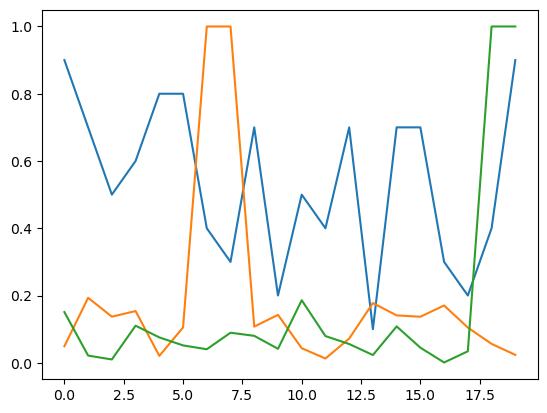

In [6]:
import matplotlib.pyplot as plt
plt.plot(sample)

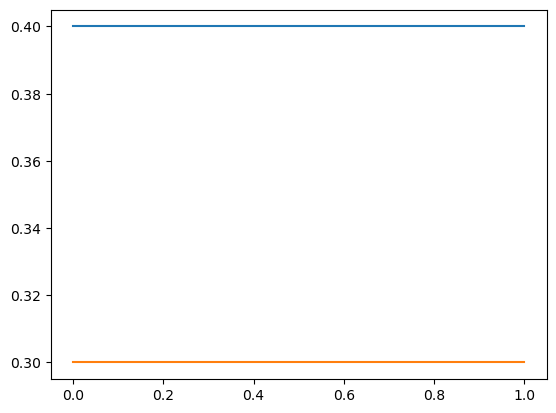

In [7]:
plt.plot(reference)

In [15]:
num_h = 64

extra_kwargs = {'multifeedforward':3}
snn_f = SNN(dataset_dict, structure=(num_h, 2, 'mf'), win=time_window,
             loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_f.set_layers()
snn_f.to(device)

snn_rnn = SNN(dataset_dict, structure=(num_h, 2, 'r'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False)

snn_rnn.set_layers()
snn_rnn.to(device)

extra_kwargs = {'delay_range':(20, 1),
                'pruned_delays': 3}

snn_rd = SNN(dataset_dict, structure=(num_h, 2, 'd'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_rd.set_layers()
snn_rd.to(device)

Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms


SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=3, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=1280, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=2, bias=False)
    )
  )
)

In [9]:
lr_tau = 1.0
train(snn_f, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=100)
train(snn_rnn, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=100)
train(snn_rd, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=100)

Mean Error: 0.00021287458366714418% 
--------------------------


Text(0.5, 1.0, 'train loss')

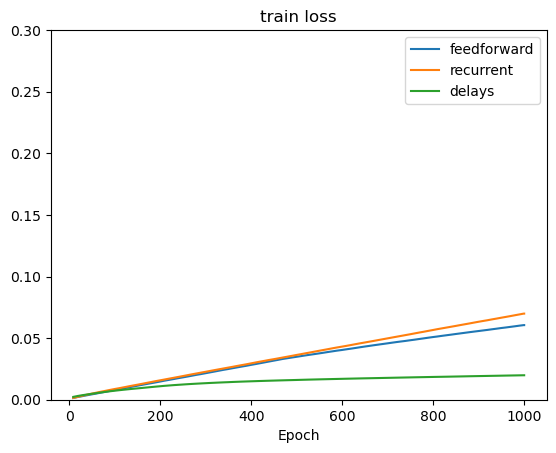

In [10]:
import numpy as np
from snn_delays.utils.visualization_utils import plot_per_epoch
import matplotlib.pyplot as plt
loss_error = np.mean(np.array(snn_f.train_loss)[:,1][-100:])
plot_per_epoch(snn_f.train_loss, label = 'feedforward')
plot_per_epoch(snn_rnn.train_loss, label = 'recurrent')
plot_per_epoch(snn_rd.train_loss, label = 'delays')
#plt.title(f'loss error = {loss_error}')

plt.ylim(0, 0.3)
plt.title('train loss')

In [11]:
snn_f.dataset_dict

{'num_input': 3,
 'num_training_samples': 32000,
 'num_output': 2,
 'dataset_name': 'copymemory_episodic',
 'time_ms': 2000.0}

In [17]:
snn_rd.train_loss

[[9, 0.0019375131726264954],
 [19, 0.002716760601848364],
 [29, 0.0033395366929471495],
 [39, 0.004005758050829172],
 [49, 0.0045878242291510106],
 [59, 0.0051503473371267315],
 [69, 0.00563670514896512],
 [79, 0.006054513409733772],
 [89, 0.0065078620947897434],
 [99, 0.00694922886788845],
 [109, 0.007352984074503183],
 [119, 0.007724955964833498],
 [129, 0.008128965556621551],
 [139, 0.00851372417807579],
 [149, 0.008912228155881167],
 [159, 0.00925277161411941],
 [169, 0.009585363613441587],
 [179, 0.009916613107547163],
 [189, 0.010232462100684642],
 [199, 0.0105394419580698],
 [209, 0.010797977048903704],
 [219, 0.011041290748864412],
 [229, 0.011277351090684532],
 [239, 0.01151836510747671],
 [249, 0.011729880908504128],
 [259, 0.011938480192795396],
 [269, 0.012142479604110122],
 [279, 0.012340951219201087],
 [289, 0.012528913693502546],
 [299, 0.012712927265092731],
 [309, 0.012885714546777309],
 [319, 0.013060335153713822],
 [329, 0.013210204882547259],
 [339, 0.01334910874255